In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234)

# Exponential random numbers
## Define a function to generate exponential random numbers

In [2]:
def exponential_rng(lam=1.0):
    """ Generates exponential random numbers.
    
    Keywords:
        lam (float): the rate parameter, the inverse expectation of the distribution.
    
    Returns:
        exponential random numbers with rate lam
    """
    return -np.log(np.random.rand()) / lam

## Test the function

In [3]:
exponential_rng()

1.6527659069609888

## Generate draws and compare to theoretical density

5.000596731383264


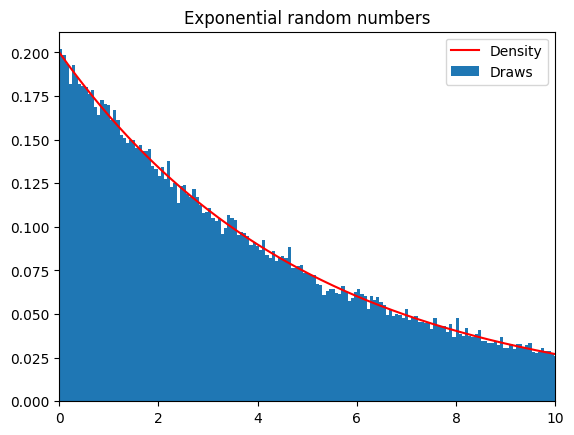

In [4]:
lam = 0.2

fig = plt.figure()
ax = plt.subplot(1,1,1)

# Theoretical Density
x = np.arange(0,10,0.0001)

exponential_pdf = lambda x: lam * np.exp(-lam * x)
ax.plot(x, exponential_pdf(x), 'r', label='Density')

#Draws
draws = [exponential_rng(lam) for i in range(100000)]
print(np.mean(draws))
num_bins = 1000
n, bins, patches = ax.hist(draws, num_bins, density=1, label='Draws')

ax.set(title='Exponential random numbers')
plt.xlim(-0.001,10)
ax.legend()
plt.show()

# Homogeneous Poisson process
## Define a function to generate arrivals according to Poisson process

In [5]:
def homogeneous_poisson_process(lam, T):
    """ Generates arrivals according to homogeneous Poisson process. 
    
    Keywords:
        lam (real): rate of Poisson process
        T (int): duration of Poisson process
    
    Returns:
        times: array of event times
    """
    
    t = 0
    times = []
    while True:
        t += exponential_rng(lam)
        if t > T:
            break
        else:
            times.append(t)
    return times

## Generate homogeneous Poisson process

In [6]:

lam = 4.0 #Poisson process rate
T = 1 #Poisson process duration
D = 10000 #Number of process draws

#homo_poisson_process(lam, T)
arrivals = [homogeneous_poisson_process(lam, T) for d in range(D)]
arrivals

[[0.05673671197711043,
  0.10144154011199244,
  0.4650679048749483,
  0.5589053363888529],
 [0.18704491617278787, 0.3147891175857689],
 [0.27568117202612025,
  0.3002792410775482,
  0.7493352213764846,
  0.9419916085745819],
 [0.27206176578569097,
  0.3683403422902393,
  0.4496652711408063,
  0.6511077210697935,
  0.8789668006465305],
 [0.23610389307359436, 0.40206894905974455, 0.699610247544993],
 [0.3720452504029352, 0.6973976562816129],
 [0.1441902916939927,
  0.3620732291965507,
  0.37319396758454676,
  0.6622808939785432,
  0.7166754706125378],
 [0.00953726574410489,
  0.10138550798906594,
  0.19729279814489814,
  0.23470470874123528,
  0.5512589404991342,
  0.5920285099683559,
  0.6174850511314034,
  0.6529999672615397,
  0.8782912844707184],
 [0.3577219882809854, 0.5512985240540266],
 [0.8775512105160915, 0.9796110169411139],
 [0.4797226291777744,
  0.5543393261632624,
  0.5643457613856001,
  0.8550967641838337],
 [0.14474697791568703,
  0.16841741650641806,
  0.2905625465359389

In [7]:
arrivals_flat = [i for a in arrivals for i in a]
arrivals_flat

[0.05673671197711043,
 0.10144154011199244,
 0.4650679048749483,
 0.5589053363888529,
 0.18704491617278787,
 0.3147891175857689,
 0.27568117202612025,
 0.3002792410775482,
 0.7493352213764846,
 0.9419916085745819,
 0.27206176578569097,
 0.3683403422902393,
 0.4496652711408063,
 0.6511077210697935,
 0.8789668006465305,
 0.23610389307359436,
 0.40206894905974455,
 0.699610247544993,
 0.3720452504029352,
 0.6973976562816129,
 0.1441902916939927,
 0.3620732291965507,
 0.37319396758454676,
 0.6622808939785432,
 0.7166754706125378,
 0.00953726574410489,
 0.10138550798906594,
 0.19729279814489814,
 0.23470470874123528,
 0.5512589404991342,
 0.5920285099683559,
 0.6174850511314034,
 0.6529999672615397,
 0.8782912844707184,
 0.3577219882809854,
 0.5512985240540266,
 0.8775512105160915,
 0.9796110169411139,
 0.4797226291777744,
 0.5543393261632624,
 0.5643457613856001,
 0.8550967641838337,
 0.14474697791568703,
 0.16841741650641806,
 0.29056254653593894,
 0.4994052357565094,
 0.7269613745302821,

## Plot arrival times

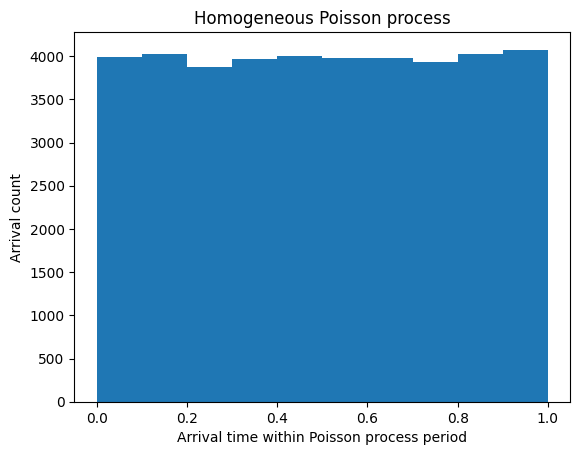

In [8]:
fig = plt.figure()
ax = plt.subplot(1,1,1)

num_bins = 10
n, bins, patches = ax.hist(arrivals_flat, num_bins, density=0)

ax.set(title='Homogeneous Poisson process',
      xlabel='Arrival time within Poisson process period',
      ylabel='Arrival count')
plt.show()

# Nonhomogeneous Poisson process
## Define a function to generate arrivals according to non-homogeneous Poisson process

In [9]:
def non_homogeneous_poisson_process(lam_t, lam_max, T):
    """ Generates arrivals according to non-homogeneous Poisson process with time-dependent rate lam_t. 
    
    Keywords:
        lam_t (function handle): function returning the Poisson process rate at time t
        lam_max (real): maximum value of lam_t(t) to be used for generating arrivals
        T (int): duration of Poisson process
    
    Returns:
        times: array of event times
    """
    
    t = 0
    times = []
    while True:
        t += exponential_rng(lam_max)
        if t > T:
            break
        else:
            u = np.random.rand()
            lam = lam_t(t)
            if u < (lam / lam_max):
                times.append(t)
    return times

## Generate nonhomogeneous poisson processes

In [10]:
lam = 4.0
lam_t = lambda t: lam * np.sin(t) + lam
lam_max = lam * 2
T = 10
D = 10000

arrivals = [non_homogeneous_poisson_process(lam_t, lam_max, T) for d in np.arange(D)]
arrivals_flat = [i for a in arrivals for i in a]
arrivals_flat

[0.27417794485907837,
 0.4730334971735014,
 0.4886813189959274,
 0.644846882005687,
 0.6791901225725858,
 0.6924656017117465,
 0.8059604137797877,
 0.8649039059994955,
 1.376256499977059,
 1.7678798115563439,
 2.034767154694097,
 2.1669880540833217,
 2.1748819342792247,
 2.447185731463878,
 2.4845675701488634,
 2.4935502090029993,
 2.687693752335746,
 3.09971409343719,
 3.3392483025965802,
 3.641304402338084,
 4.199811208247516,
 5.837579193791006,
 6.078224693397386,
 6.380586290098314,
 6.4629049001160555,
 6.482872211069012,
 6.544168513325236,
 6.553794766755919,
 6.782195847939212,
 7.009313756765342,
 7.2910079562812875,
 7.568150995553006,
 7.589219853340399,
 7.844241426853243,
 8.042514896104896,
 8.280397001006286,
 8.394052622654396,
 8.638979721675046,
 8.914186402554254,
 9.117651337082268,
 9.146818531331258,
 9.227355515581388,
 9.436727561841012,
 9.547746936187654,
 9.747236839168687,
 9.83417365569469,
 9.857577333681547,
 0.22643465088147982,
 0.24968051453657977,
 0

## Plot arrival times

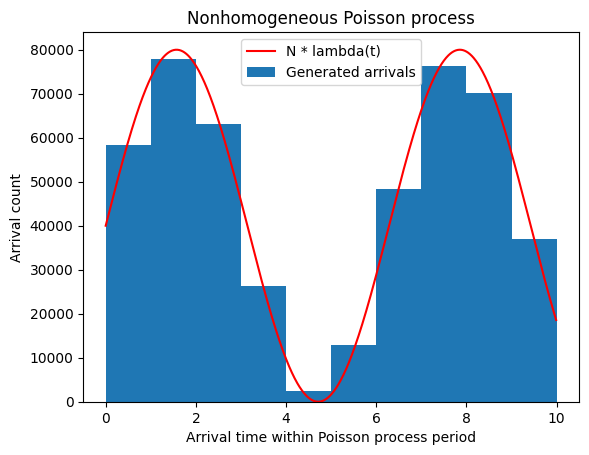

In [11]:
fig = plt.figure()
ax = plt.subplot(1,1,1)

#Lambda function
x = np.arange(0,T,0.01)
lam_func = lambda x: D * lam_t(x)
ax.plot(x, lam_func(x), 'r', label='N * lambda(t)')

#Generate arrivals
num_bins = 10
n, bins, patches = ax.hist(arrivals_flat, num_bins, density=0, label='Generated arrivals')

ax.set(title='Nonhomogeneous Poisson process',
      xlabel='Arrival time within Poisson process period',
      ylabel='Arrival count')
ax.legend()
plt.show()

## Extra questions
### Efficiency

In [12]:
def non_homogeneous_poisson_process_extra0(lam_t, lam_max, T):
    """ Generates arrivals according to non-homogeneous Poisson process with time-dependent rate lam_t. 
    
    Keywords:
        lam_t (function handle): function returning the Poisson process rate at time t
        lam_max (real): maximum value of lam_t(t) to be used for generating arrivals
        T (int): duration of Poisson process
    
    Returns:
        times: array of event times
        efficiency (real): (0-1) efficiency of non-homogeneous Poisson process 
    """
    
    t = 0
    times = []
    counter = 0
    
    t = 0
    times = []
    while True:
        t += exponential_rng(lam_max)
        if t > T:
            break
        else:
            u = np.random.rand()
            lam = lam_t(t)
            counter += 1
            if u < (lam / lam_max):
                times.append(t)
    efficiency = len(times) / counter
    return times, efficiency

In [13]:
lam = 4.0
lam_t = lambda t: lam * np.sin(t) + lam
lam_max = lam * 2
T = 10
D = 1000

arrivals, efficiency = zip(*[non_homogeneous_poisson_process_extra0(lam_t, lam_max, T) for d in range(D)])
len(efficiency)
#np.mean(efficiency)

1000

### Piecewise lambda

In [14]:
def non_homogeneous_poisson_process_extra1(lam_t, lam_max, T):
    """ Generates arrivals according to non-homogeneous Poisson process with time-dependent rate lam_t. 
    
    Keywords:
        lam_t (function handle): function returning the Poisson process rate at time t
        lam_max (real): maximum value of lam_t(t) to be used for generating arrivals
        T (int): duration of Poisson process
    
    Returns:
        times: array of event times
        efficiency (real): (0-1) efficiency of non-homogeneous Poisson process 
    """
    
    t = 0
    times = []
    counter = 0
    
    #Piecewise lam_max
    lam_max_tmp = lam_max #for 0 to pi
    lam_max_tmp_nxt = lam_max / 2 #for pi to 2*pi
    interval = 1
    
    while True: 
        #Calculate correct inter-arrival time
        inter_arrival_time = exponential_rng(lam_max_tmp)
        while True:
            if t + inter_arrival_time > interval * np.pi: #If outside of current interval
                if t + inter_arrival_time > T: 
                    #If outside Poisson process period, then terminate.
                    return times, len(times) / counter
                else: 
                    #If inside Poisson process period, then generate inter-arrival time with rate lam_t+1 
                    #such that inter-arrival time + current time outside of current interval
                    inter_arrival_time -= interval * np.pi - t
                    inter_arrival_time *= lam_max_tmp / lam_max_tmp_nxt
                    t = interval * np.pi
                    
                    interval += 1
                    lam_max_tmp_old = lam_max_tmp
                    lam_max_tmp = lam_max_tmp_nxt
                    lam_max_tmp_nxt = lam_max_tmp_old
            else: #If inside current interval
                if t + inter_arrival_time > T: 
                    #If outside poisson process period, then terminate. 
                    return times, len(times) / counter
                else: 
                    #If inside Poisson process period, then break. 
                    break
        
        #Generate event
        t += inter_arrival_time
        u = np.random.rand()
        lam = lam_t(t)
        counter += 1
        if u < (lam / lam_max_tmp):
            times.append(t)

In [15]:
arrivals, efficiency = zip(*[non_homogeneous_poisson_process_extra1(lam_t, lam_max, T) for d in range(D)])
np.mean(efficiency)

0.7255124621575503

In [16]:
arrivals = []
efficiency = []
for d in range(10):
    arrivals_i, efficiency_i = non_homogeneous_poisson_process_extra1(lam_t, lam_max, T)
    arrivals.append(arrivals_i)
    efficiency.append(efficiency_i)

print(np.mean(efficiency))

0.7356792853261194
